In [65]:
import networkx as nx
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [48]:
df = pd.read_csv("../dataset/dataset.csv")

In [49]:
G = nx.Graph()

In [50]:
people = set(df[['person', 'category']].itertuples(index=False, name=None))

In [51]:
for person in people:
    name = person[0]
    role = person[1]
    G.add_node(name)
    G.nodes[name]['role'] = role

In [52]:
actor_pairs = df.groupby("movie")["person"].apply(list)
for actors in tqdm(actor_pairs):
    for actor1 in actors:
        for actor2 in actors:
            if actor1 != actor2:
                if G.has_edge(actor1, actor2):
                    G[actor1][actor2]["weight"] += 1
                else:
                    G.add_edge(actor1, actor2, weight=1)

100%|██████████| 10789/10789 [00:00<00:00, 13603.69it/s]


In [53]:
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
print(sorted_degree_centrality[:10])  # Print the top 10 actors by degree centrality


[('Nicolas Cage', 0.013923453188020253), ('Samuel L. Jackson', 0.012829314339655024), ('Jason Blum', 0.012421693984381706), ('Bruce Willis', 0.012099888440744873), ('Robert De Niro', 0.012078434737835752), ('Scott Rudin', 0.011306101433107354), ('Brian Grazer', 0.011027203295288767), ('James Newton Howard', 0.01094138848365228), ('Tim Bevan', 0.010683944048742813), ('Tom Hanks', 0.010512314425469836)]


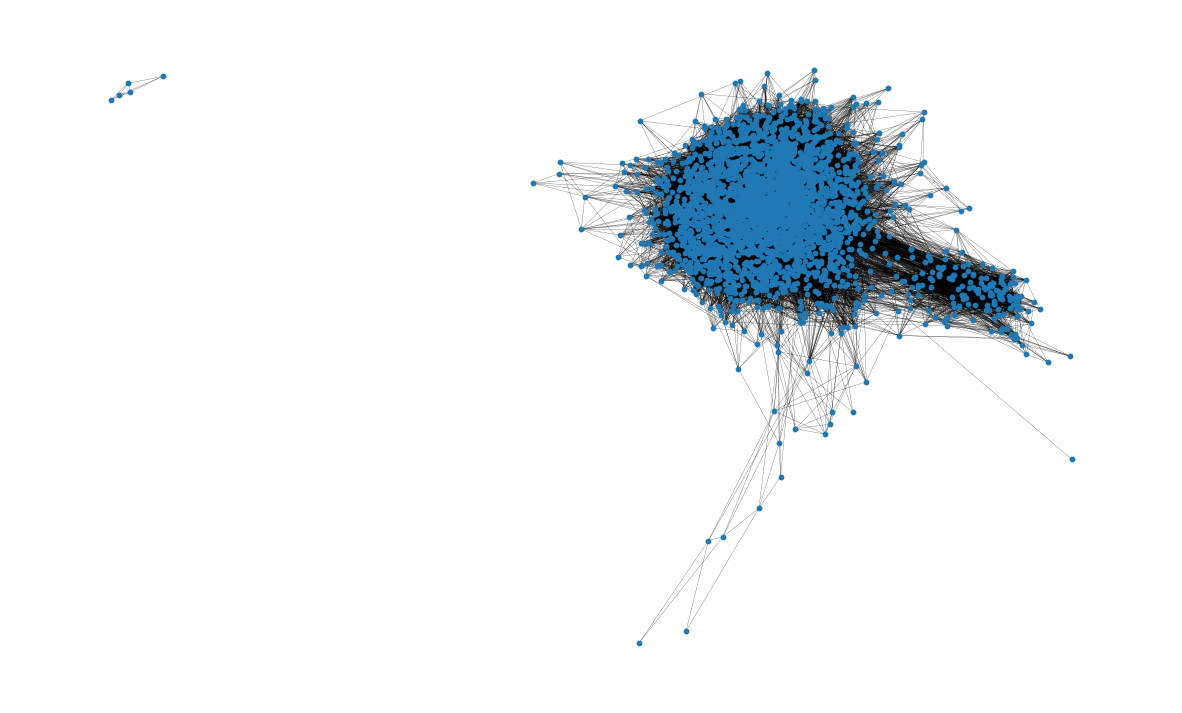

In [62]:
degree_centrality = nx.degree_centrality(G)
# Sort nodes by degree centrality in descending order
sorted_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Select the top N nodes (e.g., top 10 nodes)
N = 3000
top_N_nodes = [node for node, centrality in sorted_nodes[:N]]
subgraph = G.subgraph(top_N_nodes)
plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(subgraph, iterations=20, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
ax.axis("off")
nx.draw_networkx(subgraph, pos=pos, ax=ax, **plot_options)

In [63]:
G.number_of_nodes()

46613

In [64]:
G.number_of_edges()

504025

In [66]:
np.mean([d for _, d in G.degree()])

21.6259412610216

In [ ]:
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

In [68]:
G.nodes['Roberto Benigni']
shortest_path_lengths['Roberto Benigni']['Margot Robbie']  # Length of shortest path between nodes 0 and 42

NameError: name 'shortest_path_lengths' is not defined